# Métricas de clasificación.

## Modelo de clasificación

Los modelo de clasificación son algoritmos de aprendizaje supervisado que tiene como objetivo asignar una etiqueta o clase a cada observación en función de sus características o atributos. Es decir, el modelo aprende a identificar patrones en los datos para poder tomar decisiones automáticas sobre nuevas instancias.

Durante la fase de entrenamiento, el modelo recibe un conjunto de datos donde cada observación tiene asociadas ciertas variables o atributos (también llamadas características) y una clase conocida. A partir de estos ejemplos, el modelo aprende las relaciones o patrones que permiten distinguir unas clases de otras.

Una vez entrenado, el modelo entra en la fase de predicción. En esta etapa, se le entregan nuevas observaciones sin etiqueta, y el modelo es capaz de clasificarlas automáticamente en una de las clases aprendidas previamente, basándose en los patrones que identificó durante el entrenamiento.

**Tipos de modelos de clasificación**



| Tipo de modelo   | Descripción                                                                 | Ejemplo aplicado                                                 | Clases posibles                                        |
|------------------|------------------------------------------------------------------------------|------------------------------------------------------------------|--------------------------------------------------------|
| Binaria          | Solo dos clases posibles: sí/no, cambio/no cambio                           | ¿El predio cambió? ¿Debe ser actualizado?                        | 0: No cambio, 1: Cambio                                 |
| Multiclase       | Más de dos clases mutuamente excluyentes                                    | ¿Uso del predio? (Residencial, Comercial, Industria)   | 0: Residencial, 1: Comercial, 2: Industrial |
| Multiclase       | Clasificación de múltiples tipos de superficie o coberturas                 | ¿Qué tipo de cobertura ?   | 0: Agricola, 1: Agua, 3: artificial, 4: zonas humedas                         |




**Pregunta guía para discusión:**

* ¿Qué significa que un modelo sea “bueno”?

* Un modelo detecta el 99.9% de los predios que cambiaron. ¿Eso lo hace confiable para planear la actualización catastral?



```{admonition} Recursos
:class: nota
  Capa vectorial:

  -20241114_GIGANTE_building_procesado2_label.geojson
  -20241214_AIPE_building_procesado2_label.geojson  
  
  [<span>&#x1F4E5;</span> 1749557367_Recursos.zip](Recursos/1749557367_Recursos.zip)

```

## Matriz de confusión

Una matriz de confusión es una herramienta que permite evaluar el desempeño de un modelo de clasificación. Compara las clases reales con las clases predichas, y organiza los resultados en una tabla que permite identificar aciertos y errores del modelo.

En problemas de clasificación binaria, la matriz tiene la siguiente estructura:




|                          | Predicción: Positiva (1) | Predicción: Negativa (0) |
|--------------------------|--------------------------|--------------------------|
| Real: Positiva (1)       | Verdadero Positivo (TP)  | Falso Negativo (FN)      |
| Real: Negativa (0)       | Falso Positivo (FP)      | Verdadero Negativo (TN)  |





- **Verdadero Positivo (TP)**: El modelo predice una clase positiva y la observación realmente pertenece a esa clase.

- **Falso Negativo (FN)**: El modelo predice una clase negativa, pero la observación pertenece en realidad a la clase positiva.

- **Falso Positivo (FP)**: El modelo predice una clase positiva, pero la observación pertenece a la clase negativa.

- **Verdadero Negativo (TN)**: El modelo predice una clase negativa y la observación realmente pertenece a esa clase.


### Ejemplo binario: “Cambio” vs “No cambio” en predios

Se dispone de un conjunto de 10 observaciones de predios. Las clases verdaderas y las predicciones del modelo son:

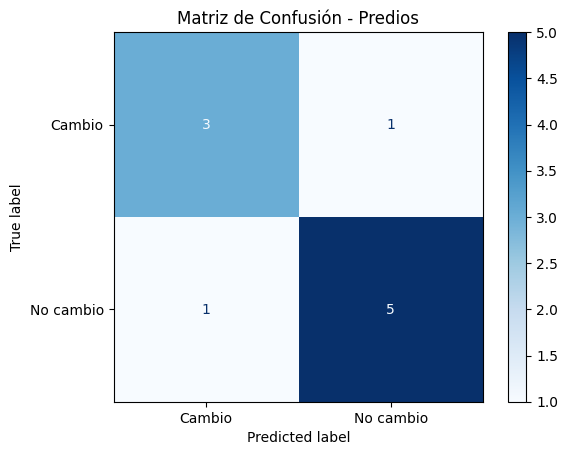

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Clases reales (1 = cambio, 0 = no cambio)
y_true = [1, 0, 1, 1, 0, 0, 1, 0, 0, 0]

# Clases predichas por el modelo
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 0, 0]

# Generar matriz de confusión
cm = confusion_matrix(y_true, y_pred, labels=[1, 0])

# Mostrar la matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cambio", "No cambio"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Predios")
plt.show()



- **TP (True Positive)**: El modelo predijo “cambio” y efectivamente hubo cambio. Se identificaron correctamente 3 de los 4 predios que sí cambiaron.

- **FN (False Negative)**: El modelo predijo “no cambio”, pero sí había cambio. Se equivocó en 1 predio que realmente cambió y no lo detectó.

- **FP (False Positive)**: El modelo predijo “cambio”, pero en realidad no lo hubo. Clasificó incorrectamente 1 predio sin cambio como si hubiera cambiado.

- **TN (True Negative)**: El modelo predijo correctamente que no hubo cambio. Clasificó correctamente 5 predios sin cambio.


### Ejemplo  multiclase: Uso del suelo

Supongamos que un modelo clasifica predios urbanos en tres clases:

- Clase 0: Residencial  
- Clase 1: Comercial  
- Clase 2: Industrial

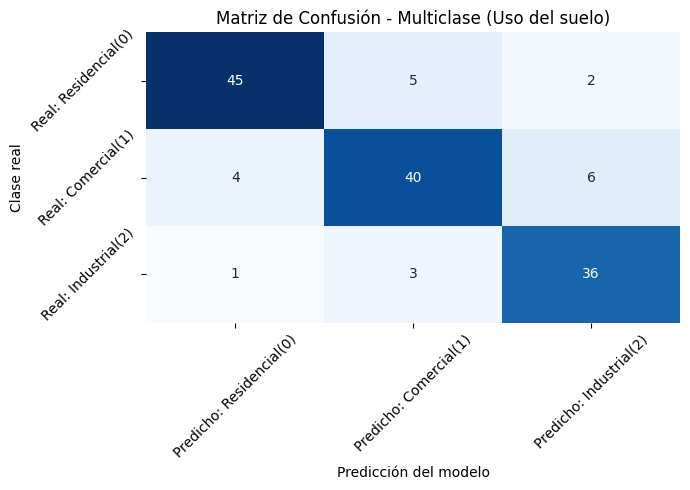

In [2]:
import pandas as pd
import seaborn as sns

# Crear la matriz de confusión como DataFrame
data = [
    [45, 5, 2],
    [4, 40, 6],
    [1, 3, 36]
]

labels = ["Residencial(0)", "Comercial(1)", "Industrial(2)"]

conf_matrix_df = pd.DataFrame(data, index=[f"Real: {label}" for label in labels],
                                    columns=[f"Predicho: {label}" for label in labels])



# También mostrar visualización
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión - Multiclase (Uso del suelo)")
plt.xlabel("Predicción del modelo")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()



- **Clase real: Comercial (Clase 1)**  
  - *TP (Verdadero Positivo)*: 40 predios comerciales fueron correctamente clasificados.  
  - *FN (Falsos Negativos)*: 10 comerciales fueron mal clasificados:  
    - 4 como residencial  
    - 6 como industrial  
  - *FP (Falsos Positivos para Comercial)*: 5 residenciales + 3 industriales fueron etiquetados incorrectamente como comerciales.

```{admonition} Nota TN en multiclase
:class: tip
En problemas de clasificación multiclase, el valor de **True Negatives (TN)** para una clase específica no aparece directamente en la matriz de confusión como ocurre en la clasificación binaria.

Sin embargo, se puede calcular utilizando la siguiente fórmula:

**Fórmula general para una clase específica (por ejemplo, clase 1):**


$$TN = N_{\text{total}} - TP - FP - FN$$

$$TN=135−40−8−10=77$$

Este valor representa todos los ejemplos que *no pertenecen a la clase evaluada y fueron correctamente clasificados como algo diferente*, es decir, aciertos "fuera de clase".
```

```{admonition} Actividad: Interpretación de la clase *Residencial (0)*
:class: important

Con base en la matriz de confusión, escribe los valores de:

   - **TP** =  
   - **FN** =  
   - **FP** =  

```


##  Exactitud, Precisión, Recall, F1-score y Especificidad

### Exactitud (Accuracy)

 Proporción de predicciones correctas sobre el total de predicciones.


$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

- Puede ser *engañosa si hay clases desbalanceadas*. Por ejemplo, si el 90 % de los predios no cambian, un modelo que siempre diga “no cambio” tendrá 90 % de accuracypero no detecta ningún cambio real.

---

###  Precisión (Precision)

Proporción de verdaderos positivos sobre el total de predicciones positivas realizadas por el modelo.


$$\text{Precision} = \frac{TP}{TP + FP}$$

- Evalúa la pureza de la clase positiva predicha. Si el modelo predice 10 cambios y solo 7 son verdaderos, la precisión es 70 %.
- Es relevante cuando los falsos positivos tienen alto costo operativo o semántico.

---

### Recall o Sensibilidad (Recall / Sensitivity)

Proporción de verdaderos positivos sobre el total de positivos reales en el conjunto de datos.


$$\text{Recall} = \frac{TP}{TP + FN}$$


- Evalúa la capacidad del modelo para detectar todos los elementos de la clase positiva.  
- Es crítico cuando los falsos negativos deben minimizarse (por ejemplo, en diagnóstico o monitoreo de cambio territorial).

---

### F1-score

Media armónica entre precisión y recall. Penaliza los modelos que tienen un alto valor en una métrica pero bajo en la otra.


$$F1 = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$


- Útil en problemas con desbalance de clases y cuando se requiere un compromiso entre precisión y sensibilidad.
  
---

### Especificidad (Specificity / True Negative Rate)

Proporción de verdaderos negativos sobre el total de observaciones que pertenecen a la clase negativa.


$$\text{Specificity} = \frac{TN}{TN + FP}$$


- Complementa al recall, evaluando qué tan bien el modelo identifica correctamente las instancias negativas.  
- Es fundamental cuando los falsos positivos deben ser controlados (por ejemplo, evitar alertas innecesarias o errores de etiquetado)

---

### Comparación

| Métrica       | ¿Qué mide?                                         | Útil cuando                         |
|---------------|-----------------------------------------------------|---------------------------------------------|
| Accuracy      | Proporción total de aciertos                        | Las clases están balanceadas                |
| Precision     | Aciertos entre los predichos como positivos         | Quieres evitar falsos positivos             |
| Recall        | Aciertos entre los positivos reales                 | Quieres evitar falsos negativos             |
| F1-score      | Equilibrio entre precisión y recall                 | Necesitas compensar ambos                   |
| Specificity   | Aciertos entre los negativos reales                 | Quieres evitar falsos positivos             |






### Ejemplo binario: “Cambio” vs “No cambio” en predios

Se modela un escenario con 100 predios urbanos, donde el objetivo es predecir si cada predio ha experimentado un cambio físico. De los 100 predios:

- 90 predios no han cambiado (clase 0)

- 10 predios sí han cambiado (clase 1)

Este caso representa una situación desbalanceada, común en contextos reales como actualización catastral, donde los eventos de cambio son relativamente raros.

In [3]:
from sklearn.metrics import classification_report

# Caso desbalanceado: pocos cambios reales
y_true = [0]*90 + [1]*10  # 90 no cambio, 10 cambio
y_pred = [0]*85 + [1]*5+ [0]*7 + [1]*3  # 85 TN, 5 FP, 5 FN, 5 TP



print(classification_report(y_true, y_pred, target_names=["No Cambio", "Cambio"]))


              precision    recall  f1-score   support

   No Cambio       0.92      0.94      0.93        90
      Cambio       0.38      0.30      0.33        10

    accuracy                           0.88       100
   macro avg       0.65      0.62      0.63       100
weighted avg       0.87      0.88      0.87       100



Aunque el modelo presenta una exactitud global del 88 %, esto se debe principalmente a su buen desempeño sobre la clase dominante ("No Cambio"). Sin embargo, su rendimiento sobre la clase de interés ("Cambio") es bajo: solo detecta la mitad de los cambios reales y se equivoca en la mitad de las veces que predice un cambio.

Al final del `classification_report` de scikit-learn, aparecen dos líneas adicionales que resumen las métricas globales: `macro avg` y `weighted avg`.


**`macro avg`**: Es el promedio simple de las métricas (precisión, recall y F1-score) calculadas para cada clase, *sin considerar el tamaño de las clases*.



$$\text{Macro avg} = \frac{\text{Métrica clase 0} + \text{Métrica clase 1}}{2}$$


- Precisión macro:  $\frac{0.92 + 0.38}{2} = 0.65$


**`weighted avg`**:Es el promedio ponderado de cada métrica, en función del número de observaciones (soporte) que tiene cada clase.


$$\text{Weighted avg} = \frac{\sum_{i} \text{métrica}_i \cdot \text{soporte}_i}{\text{total}}$$


- Precisión ponderada:  $\frac{0.92 \cdot 90 + 0.38 \cdot 10}{100} = 0.87$


In [4]:
cm = confusion_matrix(y_true, y_pred, labels=[1, 0])

TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]

# Calcular especificidad
specificity = TN / (TN + FP)
specificity

np.float64(0.9444444444444444)

El `classification_report` de sklearn no incluye la especificidad (Specificity o True Negative Rate) por defecto. Sin embargo, puedes obtenerla a partir de la matriz de confusión usando la fórmula. El valor obtenido 0.944,es decir, el modelo identificó correctamente el 94.4 % de los predios que realmente `no cambiaron`.

## Curva ROC y AUC

### Curva ROC

La *curva ROC*(Receiver Operating Characteristic) es una representación gráfica del rendimiento de un modelo de clasificación binaria en distintos **umbrales de decisión**.

En lugar de fijar un umbral (por ejemplo, 0.5), la curva ROC evalúa **cómo cambian las tasas de verdaderos y falsos positivos** al variar ese umbral de 0 a 1.

---

### Ejes de la curva ROC

- **Eje X: FPR (False Positive Rate)**  
  También conocida como $1 - \text{Especificidad}$ , esta métrica indica la proporción de negativos reales que fueron incorrectamente clasificados como positivos.

  
  $$\text{FPR} = \frac{FP}{FP + TN}$$


- **Eje Y: TPR (True Positive Rate) o Recall o Sensibilidad**  
  Esta métrica indica la proporción de positivos reales que fueron correctamente identificados por el modelo.

  
  $$\text{TPR} = \frac{TP}{TP + FN}$$
  

Cada punto de la curva ROC representa el rendimiento del modelo para un **umbral específico** de decisión.



####  Ejemplo: Construcción curva ROC

Un modelo que evalúa si hubo cambio físico en 5 predios. El modelo no te dice directamente “sí” o “no”, sino que te da una probabilidad de que haya ocurrido un cambio. Pero tú debes decidir a partir de qué punto (umbral) consideras que esa probabilidad significa realmente un cambio. Vamos a usar tres umbrales para ver cómo cambia la decisión ( 0.85, 0.60, 0.30)

**Clasificación por umbrales: 0.85, 0.60, 0.30**

| Predio | Real | Score | Pred (0.85) | Clase | Pred (0.60) | Clase | Pred (0.30) | Clase |
| ------ | ---- | ----- | ----------- | ----- | ----------- | ----- | ----------- | ----- |
| A      | 1    | 0.90  | 1           | TP    | 1           | TP    |             |       |
| B      | 0    | 0.80  | 0           | TN    | 1           | FP    |             |       |
| C      | 1    | 0.65  | 0           | FN    | 1           | TP    |             |       |
| D      | 0    | 0.40  | 0           | TN    | 0           | TN    |             |       |
| E      | 0    | 0.30  | 0           | TN    | 0           | TN    |             |       |


```{admonition}  Actividad
:class: important
Complete los valores para el  umbral 0.30

```

**Métricas por umbral**


| Umbral | TP | FP | TN | FN | TPR (Recall) | FPR (1 - Especificidad) |
| ------ | -- | -- | -- | -- | ------------ | ----------------------- |
| 0.85   | 1  | 0  | 3  | 1  | 0.50         | 0.00                    |
| 0.60   | 2  | 1  | 2  | 0  | 1.00         | 0.33                    |
| 0.30   | 2  | 3  | 0  | 0  | 1.00         | 1.00                    |

- Con umbral 0.85, el modelo es muy conservador: pocos falsos positivos, pero se le escapan cambios (FN).
- Con umbral 0.60 logra un balance entre sensibilidad (1.0) y especificidad (aún aceptable).
- Con 0.30, el modelo es agresivo detecta todos los cambios, pero comete muchos falsos positivos.



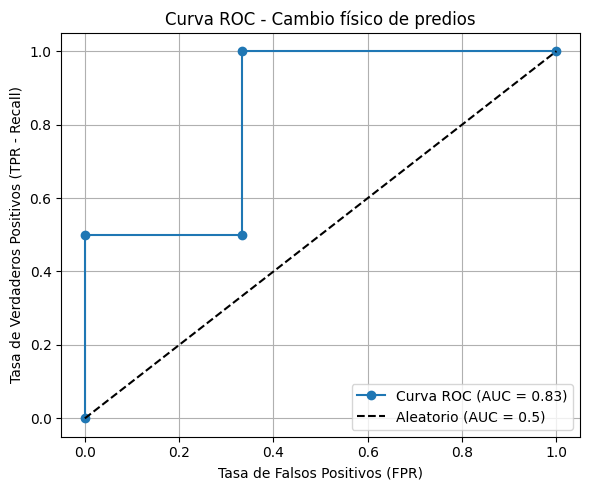

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Datos reales y scores del modelo
y_true = [1, 0, 1, 0, 0]  # Real: 1=cambio, 0=no cambio
y_scores = [0.90, 0.80, 0.65, 0.40, 0.30]  # Score del modelo

# Calcular FPR, TPR y umbrales
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, marker='o', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR - Recall)')
plt.title('Curva ROC - Cambio físico de predios')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


<p style="text-align: left; font-size: 14px;">
    <strong> Fig.1. </strong><br>
    Curva ROC: Evaluando el Desempeño de un Clasificado
</p>

```{image} Imagenes/Curva_roc.JPG
:width: 500px
:align: left
:alt: unidad
```

<div style="clear: both;"></div> <p style="text-align: left; font-size: 14px;"> <strong>Nota.</strong> Fuente propia. </p>

 Si el modelo es muy bueno, veremos que su curva se aproxima mucho a la esquina superior izquierda. Mientras más se aleje de la diagonal roja.

```{admonition} Curva ROC en clasificación multiclase
:class: danger
La curva ROC fue diseñada para problemas binarios, donde comparamos una clase positiva frente a una negativa.
En clasificación multiclase, no se puede aplicar directamente porque no hay una única clase positiva contra otra negativa: hay varias clases al mismo tiempo.

- **One-vs-Rest (OvR):** Se calcula una curva ROC por cada clase, tratándola como “positiva” contra todas las demás.

```

### AUC (Area Under the ROC Curve)

El AUC representa la probabilidad de que el modelo asigne una mayor probabilidad a la instancia positiva que a la negativa. Siempre toma un valor entre 0 :

*  AUC = 1.0 : El modelo es perfecto: siempre pone a los positivos arriba y a los negativos abajo.

*  AUC = 0.5 : El modelo no distingue entre clases, como si adivinara al azar.

* AUC < 0.5 : El modelo se equivoca más de lo que acierta


### AUC promedio (macro o micro)

Cuando usamos AUC en clasificación multiclase, podemos obtener un valor resumen del rendimiento del modelo promediando los AUCs de cada clase. Hay dos formas comunes de hacerlo:

 * **AUC macro:** calcula el AUC de cada clase por separado y luego hace un promedio simple. Así, todas las clases tienen el mismo peso, sin importar   cuántas muestras tengan.
  
* **AUC micro:** combina todas las predicciones y calcula el AUC considerando todos los verdaderos y falsos positivos juntos. De esta forma, las clases con más datos influyen más en el resultado.


## Caso de Estudio: Comparación de Datos de Edificaciones entre el Catastro Colombiano y Google Open Buildings

Se busca compara dos fuentes de información sobre construcciones en los municipios de Aipe y Gigante: el catastro oficial y los datos de Google Open Buildings, con el objetivo de evaluar su concordancia y posibles diferencias.
Para realizar esta comparación, se generan diversas columnas que agrupan las características en tres categorías principales:

* Características de forma: Se analizó la similitud geométrica entre los polígonos de ambas fuentes.

* Posición: Se calcularon la distancia entre centroides y la diferencia angular en la orientación de los edificios.

* Intersección: Se midió la superposición entre polígonos

Además, se incluyó una columna de etiquetas que clasifica los polígonos en tres categorías:

* Cambio significativo (0): Polígonos que representan alteraciones sustanciales en comparación con la base catastral.
* Cambio moderado (1): Polígonos que presentan modificaciones perceptibles, pero menos drásticas que las de la categoría anterior.
* No hay cambio (2): Polígonos que no muestran diferencias relevantes con respecto a los datos base.



<p style="text-align: left; font-size: 14px;">
    <strong> Fig.2. </strong><br>
    Capas catastrales y GEE
</p>

```{image} Imagenes/gee.JPG
:width: 500px
:align: left
:alt: unidad
```

<div style="clear: both;"></div> <p style="text-align: left; font-size: 14px;"> <strong>Nota.</strong> Fuente propia. </p>

Ahora que ya entendemos qué es la curva ROC y el AUC, vamos a aplicar estos conceptos retomando el estudio de caso del Módulo 6, donde comparamos los datos de edificaciones del Catastro Colombiano con los del proyecto Google Open Buildings.

En este ejercicio, vamos a entrenar un modelo de clasificación, específicamente un Random Forest, haremos en dos escenarios diferentes, primero usando los datos desbalanceados, tal como vienen originalmente, y luego con los datos balanceados.

In [6]:
%%capture


#Descargar el ZIP desde GitHub
!wget https://github.com/Luisafrodriguezo1/Diplomado_PDI/raw/refs/heads/main/D2M1_2_supervisado/D2M1_22_Metricas_clasificacion_recurso.zip -O /content/D2M1_22_Metricas_clasificacion_recurso.zip

#Descomprimir
!unzip /content/D2M1_22_Metricas_clasificacion_recurso.zip -d /content

In [7]:
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

Cargamos los datos de edificaciones procesadas para los municipios de Gigante y Aipe desde archivos GeoJSON.Luego, combinamos ambos conjuntos en un único GeoDataFrame.

In [8]:
directorio= "/content/D2M1_22_Metricas_clasificacion_recurso"
archivos=['20241114_GIGANTE_building_procesado2_label.geojson',
 '20241214_AIPE_building_procesado2_label.geojson']

In [9]:
gdfs=[]
for geojson in archivos:
    ruta = os.path.join(directorio, geojson)
    gdf = gpd.read_file(  ruta)
    gdfs.append(gdf)

gdf_concat=gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

In [10]:
gdf_concat.head()

,id,UOI_max,Hausdorff_Distance,neighbors_count,Centroid_Distance,google_mbr_angle_deg,google_mbr_direction,catastro_mbr_angle_deg,catastro_mbr_direction,google_custom_angle_deg,...,google_centroid_y,catastro_centroid_x,catastro_centroid_y,hausdorff_to_combined,intersections,intersected_area,area_in_meters,perimeter,LABEL_FINAL,geometry
0,413061,0.000000,1003.000000,0,-1.000000,NaN,None,NaN,None,NaN,...,1.832932e+06,0.000000e+00,0.000000e+00,-1.000000,NaN,0.000000,23.344865,19.388882,0,"POLYGON ((4714505.149 1832935.353, 4714508.722..."
1,413062,0.336396,5.244896,3,3.117759,150.803488,right,144.508134,right,59.653707,...,1.833855e+06,4.716547e+06,1.833852e+06,4.313561,2.0,164.326415,222.473820,60.211632,2,"POLYGON ((4716542.982 1833864.368, 4716557.884..."
2,413063,0.000000,1003.000000,0,-1.000000,NaN,None,NaN,None,NaN,...,1.834906e+06,0.000000e+00,0.000000e+00,-1.000000,NaN,0.000000,62.778679,31.967788,0,"POLYGON ((4717560.603 1834902.042, 4717554.037..."
3,413064,0.000000,1003.000000,0,-1.000000,NaN,None,NaN,None,NaN,...,1.833813e+06,0.000000e+00,0.000000e+00,-1.000000,NaN,0.000000,16.268728,16.177043,0,"POLYGON ((4721909.092 1833815.542, 4721910.277..."
4,413065,0.343717,15.427753,1,5.366902,178.111779,right,87.862900,right,63.170795,...,1.830154e+06,4.714821e+06,1.830152e+06,15.427753,1.0,199.543511,245.481629,80.380421,2,"POLYGON ((4714826.198 1830161.256, 4714826.176..."


In [11]:
gdf_concat.columns

Index(['id', 'UOI_max', 'Hausdorff_Distance', 'neighbors_count',
       'Centroid_Distance', 'google_mbr_angle_deg', 'google_mbr_direction',
       'catastro_mbr_angle_deg', 'catastro_mbr_direction',
       'google_custom_angle_deg', 'google_custom_direction',
       'catastro_custom_angle_deg', 'catastro_custom_direction',
       'adjusted_catastro_mbr_angle', 'angle_difference',
       'custom_angle_difference', 'num_intersections', 'combined_area',
       'combined_area_intersections', 'combined_UOI', 'union_area',
       'google_area_minus_inters', 'google_centroid_x', 'google_centroid_y',
       'catastro_centroid_x', 'catastro_centroid_y', 'hausdorff_to_combined',
       'intersections', 'intersected_area', 'area_in_meters', 'perimeter',
       'LABEL_FINAL', 'geometry'],
      dtype='object')

Se exploran varias columnas que nos permiten comparar las edificaciones de Google Open Buildings con el catastro. Algunas  son:

`Hausdorff_Distance`: Mide la mayor distancia entre los bordes de un polígono de Google y su par más cercano en catastro. Un valor alto sugiere diferencias significativas en forma.

`Centroid_Distance`: Indica qué tan alejados están los centroides de los edificios en ambas fuentes.

`num_intersections`: Cuenta cuántas intersecciones existen entre los polígonos.

`combined_UOI` (Unión sobre Intersección combinada): Relación entre el área superpuesta y la unión total de ambos polígonos.

`LABEL_FINAL`: Clasifica los cambios en tres niveles (0: cambio significativo, 1: cambio moderado, 2: sin cambio).

In [12]:
gdf_concat.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20977 entries, 0 to 20976
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           20977 non-null  object  
 1   UOI_max                      20977 non-null  float64 
 2   Hausdorff_Distance           20977 non-null  float64 
 3   neighbors_count              20977 non-null  int32   
 4   Centroid_Distance            20977 non-null  float64 
 5   google_mbr_angle_deg         13521 non-null  float64 
 6   google_mbr_direction         13521 non-null  object  
 7   catastro_mbr_angle_deg       13521 non-null  float64 
 8   catastro_mbr_direction       13521 non-null  object  
 9   google_custom_angle_deg      13354 non-null  float64 
 10  google_custom_direction      13521 non-null  object  
 11  catastro_custom_angle_deg    13333 non-null  float64 
 12  catastro_custom_direction    13521 non-null  object 

El dataset consolidado `gdf_concat` contiene 20,977 registros y 33 característica

In [13]:
gdf_concat.shape

(20977, 33)

In [14]:
gdf_concat[gdf_concat['LABEL_FINAL'].isna()]

,id,UOI_max,Hausdorff_Distance,neighbors_count,Centroid_Distance,google_mbr_angle_deg,google_mbr_direction,catastro_mbr_angle_deg,catastro_mbr_direction,google_custom_angle_deg,...,google_centroid_y,catastro_centroid_x,catastro_centroid_y,hausdorff_to_combined,intersections,intersected_area,area_in_meters,perimeter,LABEL_FINAL,geometry


In [15]:
gdf_concat['LABEL_FINAL'].value_counts()

,count
LABEL_FINAL,
2,10872
0,8367
1,1738


**División del conjunto de datos **

In [16]:
 #Variables predictoras,variable de respuesta y id
X = gdf_concat.drop(columns=['LABEL_FINAL', 'id', 'geometry'])
y = gdf_concat['LABEL_FINAL'].astype(int)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test, ids_train, ids_test, geometries_train, geometries_test = train_test_split(
X, y, gdf_concat['id'], gdf_concat['geometry'], test_size=0.2, random_state=42)

In [17]:
print("Conjunto de datos",gdf_concat.shape)
print("Variales predictorias",X_train.shape,X_test.shape)
print("Variable respuesta",y_train.shape,y_test.shape)
print("Id",ids_train.shape,ids_test.shape)
print("Geométria",geometries_train.shape,geometries_test.shape)

Conjunto de datos (20977, 33)
Variales predictorias (16781, 30) (4196, 30)
Variable respuesta (16781,) (4196,)
Id (16781,) (4196,)
Geométria (16781,) (4196,)


Se convierten las columnas categóricas a valores numéricos usando `LabelEncoder` y aplica `astype(str) `para evitar errores con valores NaN o formatos inconsistentes.

In [18]:
from sklearn.preprocessing import LabelEncoder

columnas_categoricas = [ 'google_mbr_direction', 'catastro_mbr_direction', 'google_custom_direction', 'catastro_custom_direction']

label_encoders = {}
for columna in columnas_categoricas:
    if columna in X_train.columns:
        le = LabelEncoder()
        X_train[columna] = le.fit_transform(X_train[columna].astype(str))
        X_test[columna] = le.transform(X_test[columna].astype(str))
        label_encoders[columna] = le

**Entrenamiento RandomForest**
Se implementa un modelo Random Forest, un número de 100 árboles (`n_estimators=100`) y una profundidad máxima de 10 (`max_depth=10`)

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf_rf.fit(X_train, y_train)


y_pred = clf_rf.predict(X_test)

In [20]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

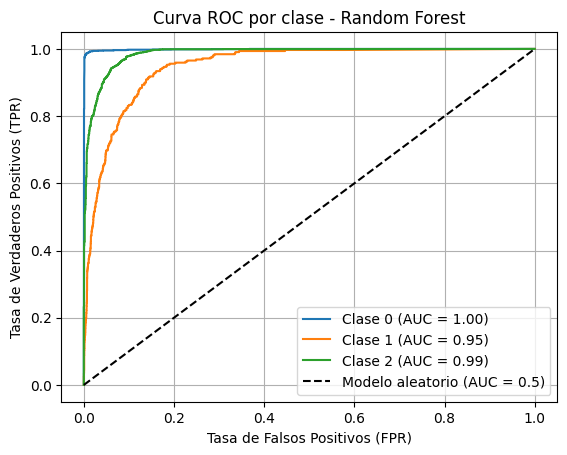

In [21]:


# Binarizar las clases (por ejemplo, para 3 clases: 0, 1, 2)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_scores = clf_rf.predict_proba(X_test)

# Calcular ROC y AUC por clase
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"Clase {classes[i]} (AUC = {roc_auc:.2f})")

# Gráfico general
plt.plot([0, 1], [0, 1], 'k--', label='Modelo aleatorio (AUC = 0.5)')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC por clase - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [22]:
from sklearn.metrics import roc_auc_score

# AUC macro-promedio (todas las clases pesan igual)
auc_macro = roc_auc_score(y_test_bin, y_scores, average='macro', multi_class='ovr')

# AUC micro-promedio (las clases frecuentes pesan más)
auc_micro = roc_auc_score(y_test_bin, y_scores, average='micro', multi_class='ovr')

print(f"AUC macro-promedio: {auc_macro:.2f}")
print(f"AUC micro-promedio: {auc_micro:.2f}")

AUC macro-promedio: 0.98
AUC micro-promedio: 0.99


```{admonition} Actividad: Evaluación de un modelo
:class: important

1. Utilizando el modelo previamente entrenado sobre los datos originales, calcula las métricas vistas.

2.Entrena nuevamente el modelo, esta vez incluyendo class_weight='balanced' para que el algoritmo compense automáticamente el desbalance entre clases.

3.Compara y analiza ambas versiones del modelo. qué métricas mejoran?

```

In [23]:
clf_rf_bl = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42,class_weight="balanced")



## Referencias

* Madrigal, M. (2024, agosto 1). *Demystifying ROC curves: Understanding performance metrics for AI classification models*. RidgeRun. https://www.ridgerun.ai/post/demystifying-roc-curves-understanding-performance-metrics-for-ai-classification-models
  
* Pachori, S. (2014, noviembre). *It's an exploratory report on data mining models and evaluation techniques*. https://doi.org/10.13140/2.1.1770.9760

* Miller, C., Portlock, T., Nyaga, D. M., & O’Sullivan, J. M. (2024). *A review of model evaluation metrics for machine learning in genetics and genomics*. *Frontiers in Bioinformatics, 4*. https://doi.org/10.3389/fbinf.2024.1457619

* Navarro, S. (2024, abril 16). *Métricas en clasificación: algunas generalidades*. KeepCoding. https://keepcoding.io/blog/metricas-en-clasificacion-generalidades/


